# DSC 345 Final Project
## Eddie Cojulun & Kavit Patel

### **About the Dataset**

Link: https://data.cityofchicago.org/Buildings/Building-Permits-Dashboard/2s3k-mec8

This dataset includes information about currently-valid building permits issued by the City of Chicago from 2006 to the present. Building permits are issued subject to payment of applicable fees. If building or zoning permit fees show as unpaid, the permit is not valid. (A permit is valid if only “other fees” are shown as unpaid.) This dataset does not include permits which have been issued and voided or revoked. This dataset also does not include permits for mechanical amusement riding devices and carnivals issued by the Department of Buildings. 



> *Below is a picture of column name and description. The last column in the picture is the count because if you look Contact_1_to_15_____ means there are 15 different columns for that, I just wrote it for summarization purposes.*




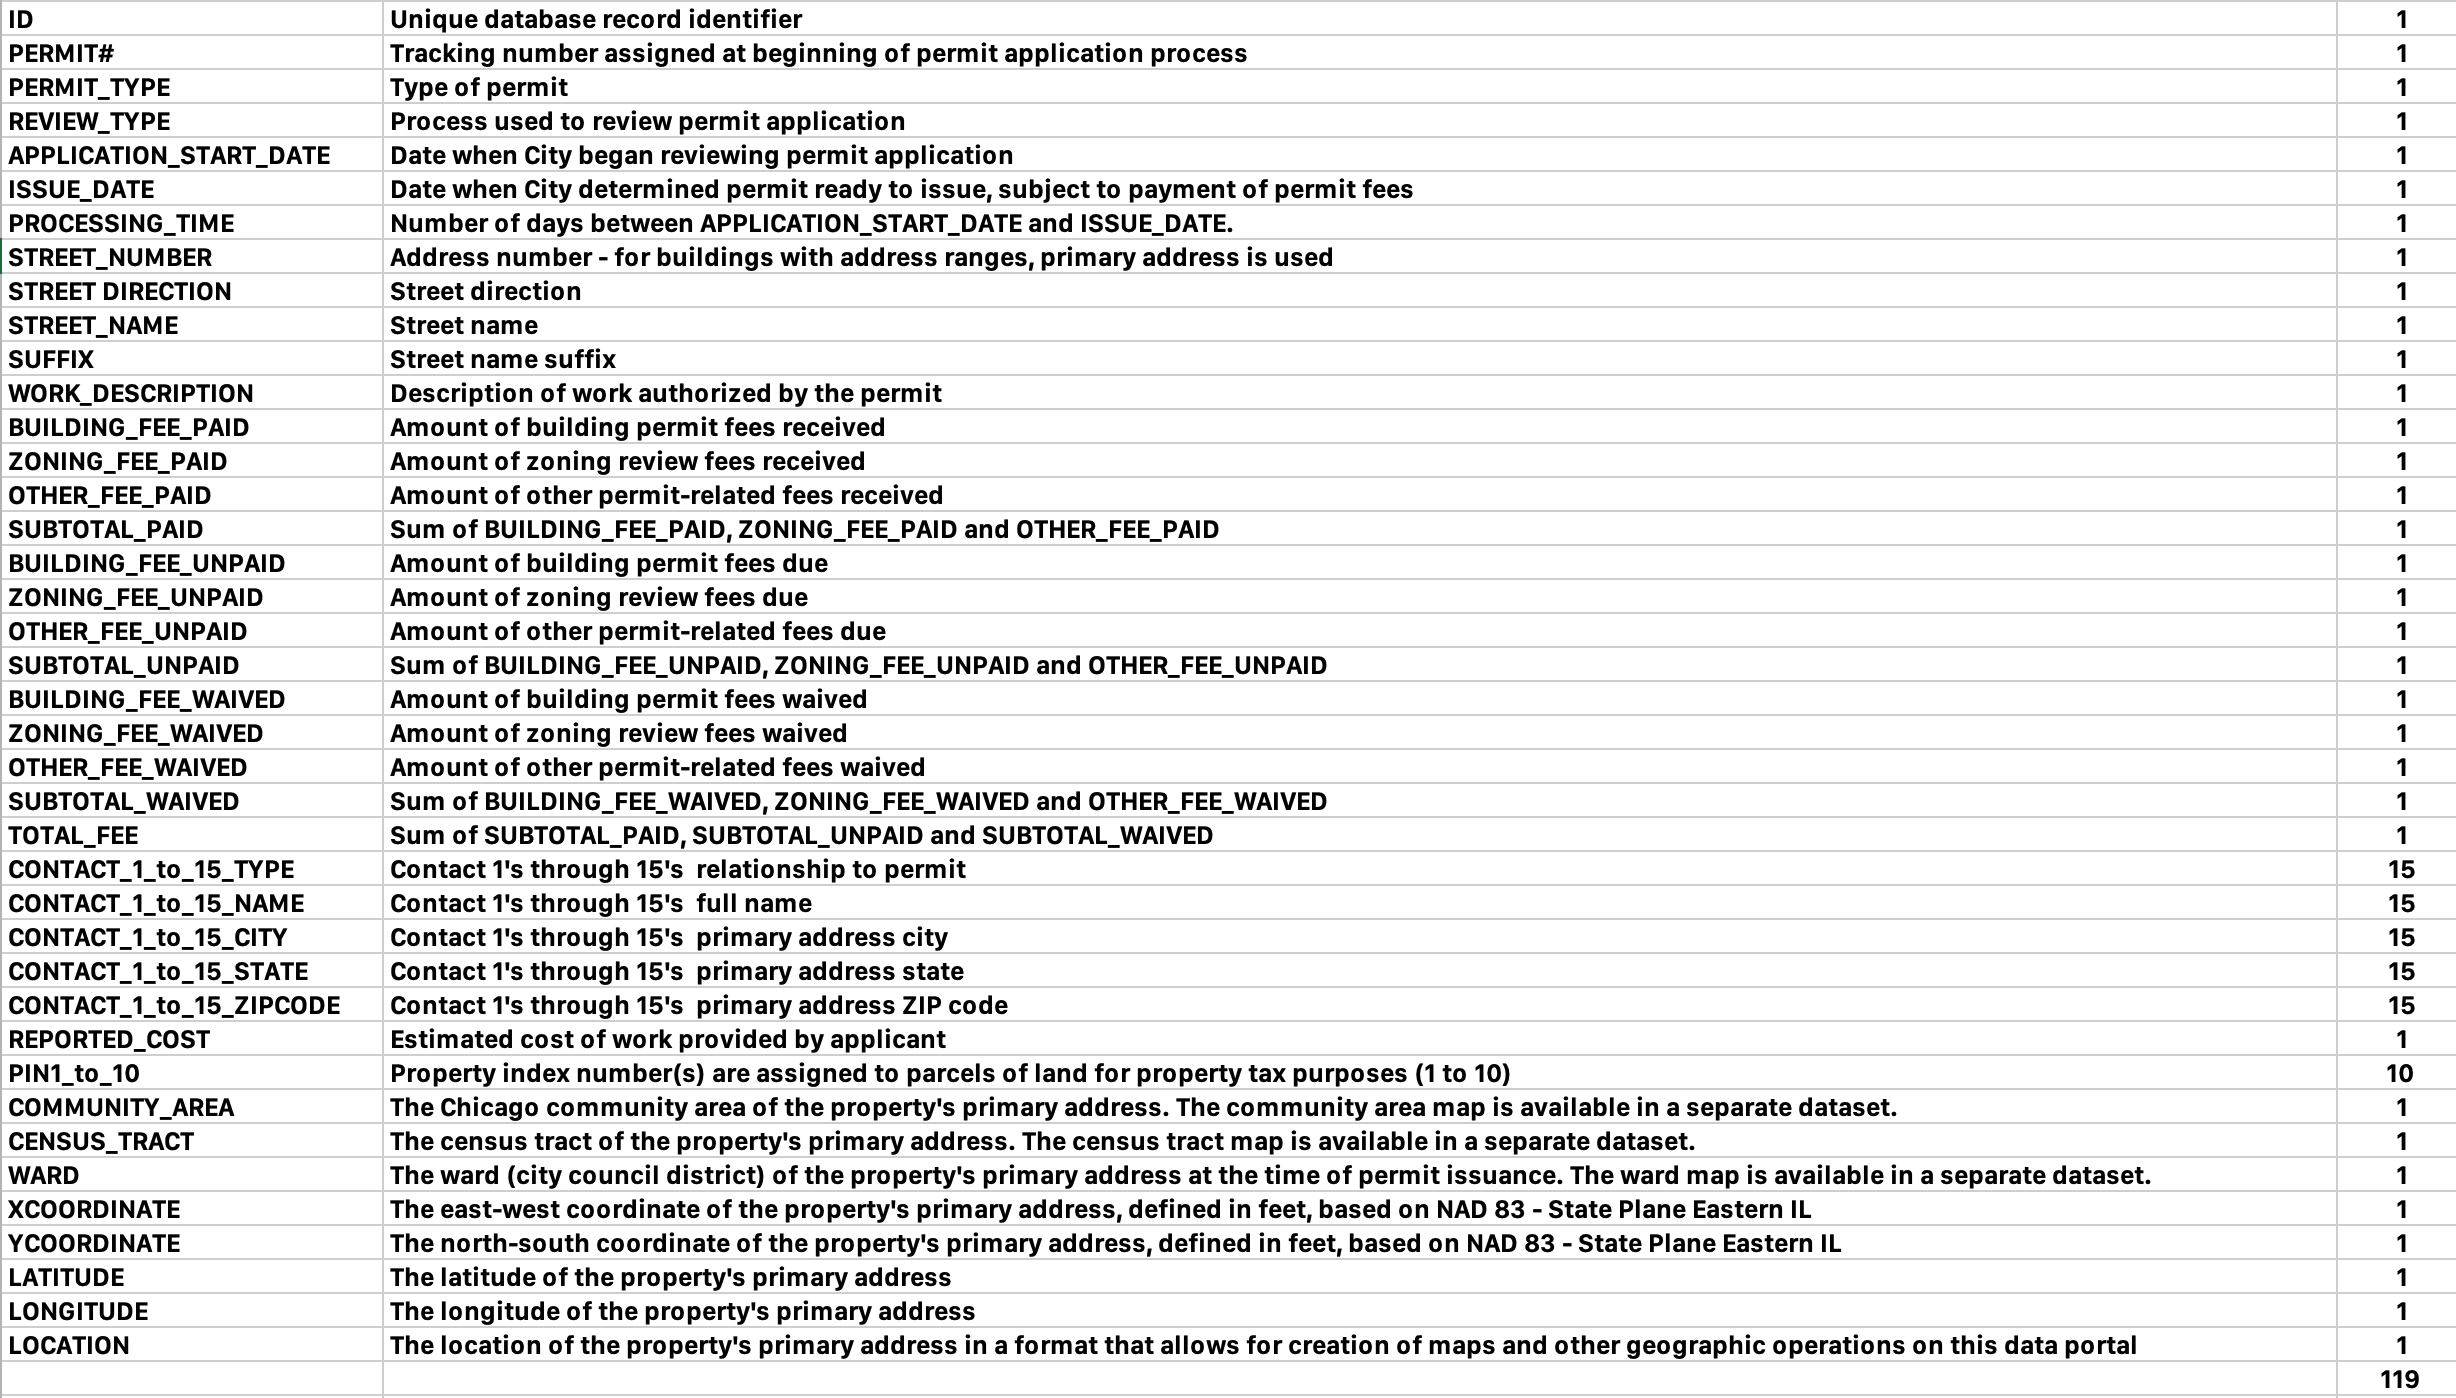

### **Import Datasets and Libraries**

In [5]:
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

In [7]:
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Building_Permits.csv")

In [10]:
df.head()

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,CONTACT_2_TYPE,CONTACT_2_NAME,CONTACT_2_CITY,CONTACT_2_STATE,CONTACT_2_ZIPCODE,CONTACT_3_TYPE,CONTACT_3_NAME,CONTACT_3_CITY,CONTACT_3_STATE,CONTACT_3_ZIPCODE,CONTACT_4_TYPE,CONTACT_4_NAME,CONTACT_4_CITY,CONTACT_4_STATE,CONTACT_4_ZIPCODE,CONTACT_5_TYPE,CONTACT_5_NAME,CONTACT_5_CITY,CONTACT_5_STATE,CONTACT_5_ZIPCODE,...,CONTACT_11_TYPE,CONTACT_11_NAME,CONTACT_11_CITY,CONTACT_11_STATE,CONTACT_11_ZIPCODE,CONTACT_12_TYPE,CONTACT_12_NAME,CONTACT_12_CITY,CONTACT_12_STATE,CONTACT_12_ZIPCODE,CONTACT_13_TYPE,CONTACT_13_NAME,CONTACT_13_CITY,CONTACT_13_STATE,CONTACT_13_ZIPCODE,CONTACT_14_TYPE,CONTACT_14_NAME,CONTACT_14_CITY,CONTACT_14_STATE,CONTACT_14_ZIPCODE,CONTACT_15_TYPE,CONTACT_15_NAME,CONTACT_15_CITY,CONTACT_15_STATE,CONTACT_15_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,1614287,100072880,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,10/14/05,1/3/06,81.0,2728,N,MONTICELLO,AVE,INTERIOR REMODELING OF EXISTING 3 D.U. PER PLA...,125.0,75.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,OWNER AS GENERAL CONTRACTOR,MARIA AND GABRIEL BAILON,CHICAGO,IL,60647,ARCHITECT,IURO ANTHONY J,CHICAGO,IL,60602-,CONTRACTOR-ELECTRICAL,J K & S ELECTRICAL CO.,SOUTH HOLLAND,IL,60473-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,13-26-305-033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151538.765,1918030.524,41.930957,-87.718543,POINT (-87.718542820893 41.930957454144),1.0,23.0,22535.0,107.0,12.0,15.0
1,1614342,100072909,PERMIT - NEW CONSTRUCTION,STANDARD PLAN REVIEW,12/5/05,3/29/06,114.0,1409,S,KEDVALE,AVE,"new construction, erect 3 story slab on grade ...",1029.6,112.5,100.0,1242.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1242.1,ARCHITECT,LISEC MICHAEL,CHICAGO X,IL,60607,BUILDING OWNER,MARVIN HUNTER,CHICAGO,IL,60623,CONTRACTOR-ELECTRICAL,HERNANDEZ ELECTRIC,CHICAGO,IL,60623-,CONTRACTOR-GENERAL CONTRACTOR,"PRECISE INDUSTRIAL SERVICES, I",CHICAGO,IL,60637-,MASON - BRICK AND CONCRETE,LARNIKKS CONTRACTING,CHICAGO,IL,60659-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.0,16-22-220-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1148985.598,1892939.490,41.862155,-87.728575,POINT (-87.728575200899 41.862154886848),57.0,30.0,21569.0,761.0,14.0,36.0
2,1614371,100072936,PERMIT - SIGNS,SIGN PERMIT,10/17/05,1/12/06,87.0,120,S,LA SALLE,ST,north elevation 386431,56.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,CONTRACTOR-ELECTRICAL,ICON IDENTITY SOLUTIONS,ROLLING MEADOWS,IL,60008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17-16-210-007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175111.613,1899771.100,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665),34.0,38.0,14311.0,92.0,36.0,22.0
3,1637148,100086388,PERMIT - RENOVATION/ALTERATION,SELF CERT,1/25/06,1/26/06,1.0,71,S,WACKER,DR,Interior alteration of existing partial 34th f...,2408.0,75.0,0.0,2483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.0,SELF CERT ARCHITECT,POWERS THOMAS E,CHICAGO X,IL,60606-,CONTRACTOR-ELECTRICAL,COMMERICAL LIGHT COMPANY,HILLSIDE,IL,60162-,CONTRACTOR-GENERAL CONTRACTOR,"EXECUTIVE CONSTRUCTION , INC.",HILLSIDE,IL,60162

### **Informations about the Data**

In [11]:
df.shape

(731965, 125)

In [12]:
#df.loc[:, 'CONTACT_2_NAME':'PIN1'].info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731965 entries, 0 to 731964
Columns: 125 entries, ID to Historical Wards 2003-2015
dtypes: float64(29), int64(2), object(94)
memory usage: 698.1+ MB


In [13]:
df.describe()

,ID,PROCESSING_TIME,STREET_NUMBER,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_15_ZIPCODE,REPORTED_COST,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards,Historical Wards 2003-2015
count,7.319650e+05,731442.000000,731965.000000,731965.000000,731965.000000,731965.000000,731965.000000,7.319650e+05,731965.000000,731965.000000,7.319650e+05,7.319650e+05,731965.000000,731965.000000,7.319650e+05,7.319650e+05,5.000000,7.315920e+05,627029.000000,622806.000000,626819.000000,7.306090e+05,7.306090e+05,729706.000000,729706.000000,724967.000000,724967.000000,729706.000000,729436.000000,724967.000000,724967.000000
mean,2.544592e+06,22.619102,3459.623691,675.771800,53.089679,79.859288,808.720767,1.371552e+01,4.110343,1.444386,1.927025e+01,1.478834e+03,1.815267,7.705815,1.488355e+03,2.316346e+03,60622.200000,2.181596e+05,31.533291,310908.642152,27.170807,1.164129e+06,1.895925e+06,41.870027,-87.672930,30.697876,38.457022,18229.384629,378.242611,27.719575,27.847777
std,4.920638e+05,105.606912,2978.582088,5774.863201,229.266674,1915.741259,6945.391623,3.056717e+03,1455.333587,270.064861,3.429744e+03,1.168870e+06,135.076753,1020.246936,1.168871e+06,1.168897e+06,10.545141,1.835020e+07,21.942630,317226.535037,15.096352,1.640747e+04,3.055238e+04,0.083763,0.059641,18.637263,19.238287,6021.778484,240.756390,13.714123,14.307623
min,8.766740e+05,-2876.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.440000e+04,-225.000000,0.000000,-1.440000e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.152747e+04,60616.000000,-1.000000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,41.644670,-87.940225,1.000000,1.000000,4094.000000,1.000000,1.000000,1.000000
25%,2.144980e+06,0.000000,946.000000,59.900000,0.000000,0.000000,75.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,7.500000e+01,60618.000000,5.000000e+02,12.000000,7302.000000,14.000000,1.154702e+06,1.871752e+06,41.803645,-87.707316,15.000000,25.000000,14917.000000,154.000000,16.000000,16.000000
50%,2.596308e+06,0.000000,2714.000000,150.000000,0.000000,0.000000,200.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.250000e+02,60618.000000,4.500000e+03,28.000000,210501.000000,29.000000,1.166995e+06,1.901762e+06,41.885830,-87.662399,30.000000,37.000000,21538.000000,367.000000,31.000000,25.000000
75%,2.972049e+06,8.000000,5346.000000,400.000000,75.000000,0.000000,450.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,5.000000e+02,60618.000000,2.000000e+04,46.000000,630400.000000,42.000000,1.175313e+06,1.918005e+06,41.930767,-87.631940,46.000000,56.000000,22216.000000,592.000000,37.000000,41.000000
max,3.311465e+06,5699.000000,111601.000000,882191.200000,42123.420000,363413.000000,999683.920000,1.944425e+06,555550.000000,156532.000000,1.944425e+06,1.000000e+09,102250.000000,263020.000000,1.000000e+09,1.000000e+09,60641.000000,1.000000e+10,77.000000,980100.000000,50.000000,1.205100e+06,1.951598e+06,42.022780,-87.524677,61.000000,77.000000,22620.000000,801.000000,50.000000,53.000000


In [14]:
#This is the variable that will try to predict. 
df['PERMIT_TYPE'].value_counts()

PERMIT - ELECTRIC WIRING          256594
PERMIT - EASY PERMIT PROCESS      200333
PERMIT - RENOVATION/ALTERATION    147095
PERMIT - SIGNS                     46816
PERMIT - NEW CONSTRUCTION          27014
PERMIT - WRECKING/DEMOLITION       19751
PERMIT - ELEVATOR EQUIPMENT        18491
PERMIT - SCAFFOLDING                8668
PERMIT - REINSTATE REVOKED PMT      4049
PERMIT - PORCH CONSTRUCTION         3096
PERMIT - FOR EXTENSION OF PMT         58
Name: PERMIT_TYPE, dtype: int64

In [15]:
df['REVIEW_TYPE'].value_counts()

EASY PERMIT WEB                   293740
EASY PERMIT                       163119
STANDARD PLAN REVIEW              125790
SIGN PERMIT                        46816
SELF CERT                          44518
DEMOLITION PERMIT                  19751
CONVEYANCE DEVICE PERMIT           18491
FIRE PROTECTION SYSTEM              6980
ELECTRICAL PLAN REVIEW              5998
TRADITIONAL DEVELOPER SERVICES      5367
DIRECT DEVELOPER SERVICES           1387
Name: REVIEW_TYPE, dtype: int64

<AxesSubplot:>

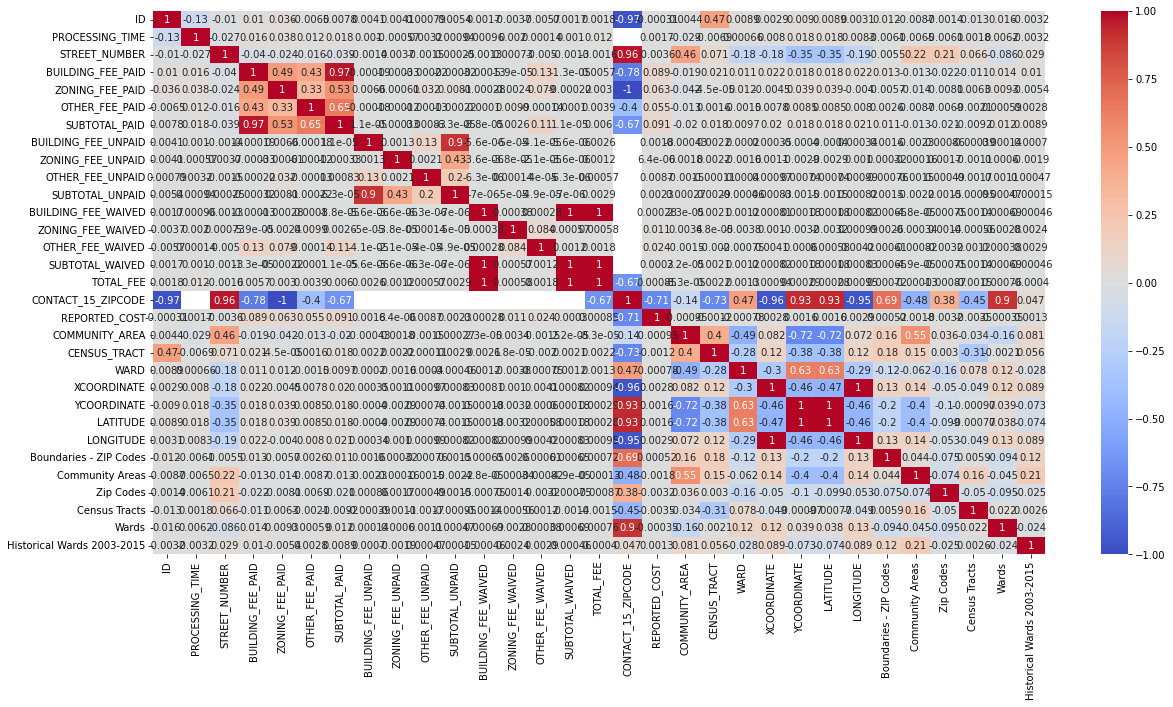

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmin = -1, vmax= 1, annot = True)

<AxesSubplot:>

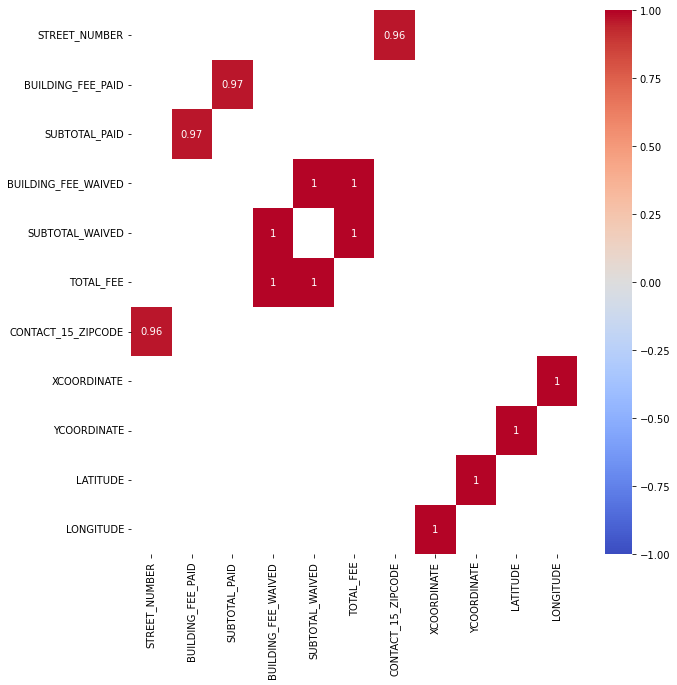

In [17]:
plt.figure(figsize=(10,10))
# .dropna(how='all', axis=0).dropna(how='all', axis=1) drops variables with all na values on x-axis and y-axis of the plot
sns.heatmap(df.corr()[(df.corr() >= 0.95) & (df.corr() < 1)].dropna(how='all', axis=0).dropna(how='all', axis=1), cmap='coolwarm', vmin = -1, vmax= 1, annot = True)

 Based on the Correlation Matrix you can tell the highly positively correlated variables are:


*   X-Coordinate with Longitude
*   Y-Coordinate with Latitude
*   Contact_15_Zipcode with Street Number - Unusual
*   Subtotal_Paid with Building_Fee_Paid
*   Subtotal_Waived with Total_Fee
*   Subtotal_Waived with Buidling_Fee_Waived
*   Total_fee with Building_Fee_Waived




<AxesSubplot:>

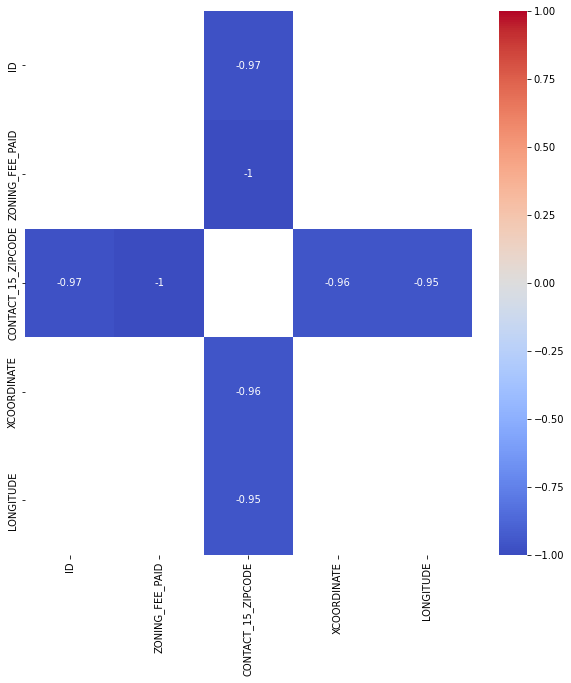

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[(df.corr() <= -0.95)].dropna(how='all', axis=0).dropna(how='all', axis=1), cmap='coolwarm', vmin = -1, vmax= 1, annot = True)

 Based on the Correlation Matrix you can tell the highly negatively correlated variables are:


*   Contact_15_Zipcode with ID
*   Contact_15_Zipcode with Zoning_Fee_Piad
*   Contact_15_Zipcode with X-Coordinate
*   Contact_15_Zipcode with Longitude



<AxesSubplot:xlabel='count', ylabel='PERMIT_TYPE'>

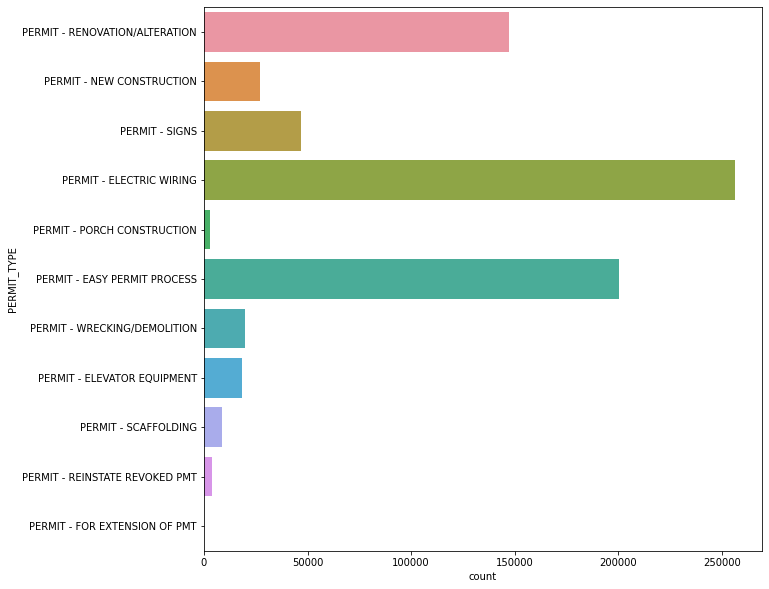

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(y=df["PERMIT_TYPE"])

<AxesSubplot:xlabel='count', ylabel='REVIEW_TYPE'>

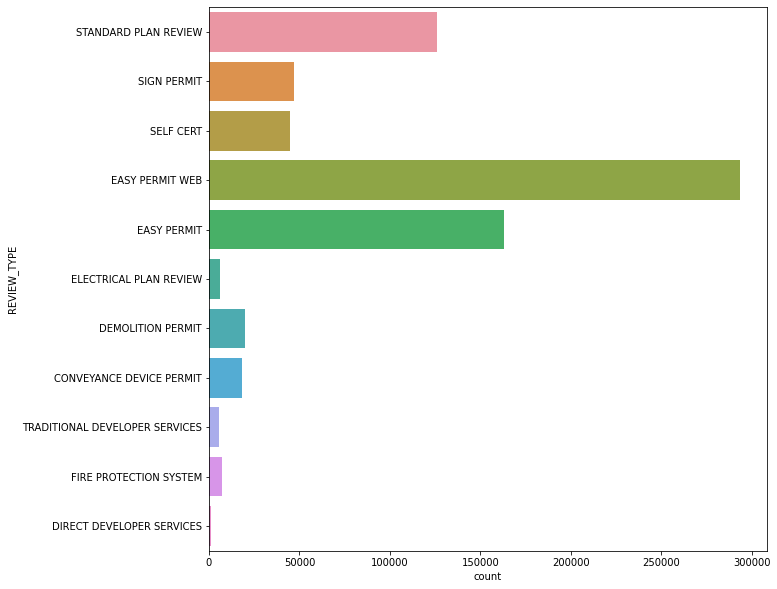

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(y=df["REVIEW_TYPE"])

In [21]:
#These columns are just id columns that just record a person's name, the data the permit was issued, or other pieces of information that don't have any real meaning
#df.PIN1.unique()
#df.STREET_NAME.unique()
#len(df.WORK_DESCRIPTION.unique())
len(df.CONTACT_1_TYPE.unique())

27

### **Data Cleaning and Dummy Variable Transformations**


In [22]:
X = df.drop(df.loc[:, 'CONTACT_2_TYPE':'CONTACT_15_ZIPCODE'].columns,axis = 1)
X = X.drop(['ID', 'PERMIT#', 'REVIEW_TYPE'],axis = 1)
X = X.drop(df.loc[:, 'PIN2':'PIN10'].columns,axis = 1)
X = X.drop(df.loc[:, 'Boundaries - ZIP Codes':'Historical Wards 2003-2015'].columns,axis = 1)
X.head()

,PERMIT_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,PERMIT - RENOVATION/ALTERATION,10/14/05,1/3/06,81.0,2728,N,MONTICELLO,AVE,INTERIOR REMODELING OF EXISTING 3 D.U. PER PLA...,125.0,75.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,OWNER AS GENERAL CONTRACTOR,MARIA AND GABRIEL BAILON,CHICAGO,IL,60647,3000.0,13-26-305-033,NaN,NaN,NaN,1151538.765,1918030.524,41.930957,-87.718543,POINT (-87.718542820893 41.930957454144)
1,PERMIT - NEW CONSTRUCTION,12/5/05,3/29/06,114.0,1409,S,KEDVALE,AVE,"new construction, erect 3 story slab on grade ...",1029.6,112.5,100.0,1242.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1242.1,ARCHITECT,LISEC MICHAEL,CHICAGO X,IL,60607,190000.0,16-22-220-004,NaN,NaN,NaN,1148985.598,1892939.490,41.862155,-87.728575,POINT (-87.728575200899 41.862154886848)
2,PERMIT - SIGNS,10/17/05,1/12/06,87.0,120,S,LA SALLE,ST,north elevation 386431,56.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,CONTRACTOR-ELECTRICAL,ICON IDENTITY SOLUTIONS,ROLLING MEADOWS,IL,60008,0.0,17-16-210-007,NaN,NaN,NaN,1175111.613,1899771.100,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665)
3,PERMIT - RENOVATION/ALTERATION,1/25/06,1/26/06,1.0,71,S,WACKER,DR,Interior alteration of existing partial 34th f...,2408.0,75.0,0.0,2483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.0,SELF CERT ARCHITECT,POWERS THOMAS E,CHICAGO X,IL,60606-,125000.0,17-16-201-016,NaN,NaN,NaN,1173987.754,1899893.636,41.880718,-87.636589,POINT (-87.636589107372 41.880717575265)
4,PERMIT - RENOVATION/ALTERATION,1/21/06,1/21/06,0.0,4901,S,CICERO,AVE,Interior alterations to the retail space on th...,2443.0,75.0,0.0,2518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2518.0,SELF CERT ARCHITECT,MANGURTEN DAVID,DEERFIELD X,IL,60015-,41527.0,19-10-113-001,NaN,NaN,NaN,1145226.467,1871678.073,41.803882,-87.742911,POINT (-87.742911007932 41.80388237071)


In [23]:
#These columns are just id columns that just record a person's name, the data the permit was issued, or other pieces of information that don't have any real meaning
X = X.drop(['APPLICATION_START_DATE', 'ISSUE_DATE', 'STREET_NAME', 'WORK_DESCRIPTION', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'PIN1', 'LOCATION'],axis = 1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731965 entries, 0 to 731964
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PERMIT_TYPE          731965 non-null  object 
 1   PROCESSING_TIME      731442 non-null  float64
 2   STREET_NUMBER        731965 non-null  int64  
 3   STREET DIRECTION     731965 non-null  object 
 4   SUFFIX               725190 non-null  object 
 5   BUILDING_FEE_PAID    731965 non-null  float64
 6   ZONING_FEE_PAID      731965 non-null  float64
 7   OTHER_FEE_PAID       731965 non-null  float64
 8   SUBTOTAL_PAID        731965 non-null  float64
 9   BUILDING_FEE_UNPAID  731965 non-null  float64
 10  ZONING_FEE_UNPAID    731965 non-null  float64
 11  OTHER_FEE_UNPAID     731965 non-null  float64
 12  SUBTOTAL_UNPAID      731965 non-null  float64
 13  BUILDING_FEE_WAIVED  731965 non-null  float64
 14  ZONING_FEE_WAIVED    731965 non-null  float64
 15  OTHER_FEE_WAIVED 

In [25]:
#Getting rid of rows that have null values
X = X.dropna(how='any')    #to drop if any value in the row has a nan
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612154 entries, 32 to 731964
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PERMIT_TYPE          612154 non-null  object 
 1   PROCESSING_TIME      612154 non-null  float64
 2   STREET_NUMBER        612154 non-null  int64  
 3   STREET DIRECTION     612154 non-null  object 
 4   SUFFIX               612154 non-null  object 
 5   BUILDING_FEE_PAID    612154 non-null  float64
 6   ZONING_FEE_PAID      612154 non-null  float64
 7   OTHER_FEE_PAID       612154 non-null  float64
 8   SUBTOTAL_PAID        612154 non-null  float64
 9   BUILDING_FEE_UNPAID  612154 non-null  float64
 10  ZONING_FEE_UNPAID    612154 non-null  float64
 11  OTHER_FEE_UNPAID     612154 non-null  float64
 12  SUBTOTAL_UNPAID      612154 non-null  float64
 13  BUILDING_FEE_WAIVED  612154 non-null  float64
 14  ZONING_FEE_WAIVED    612154 non-null  float64
 15  OTHER_FEE_WAIVED

In [26]:
y = X['PERMIT_TYPE']

In [27]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 612154 entries, 32 to 731964
Series name: PERMIT_TYPE
Non-Null Count   Dtype 
--------------   ----- 
612154 non-null  object
dtypes: object(1)
memory usage: 9.3+ MB


In [28]:
X = X.drop('PERMIT_TYPE',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612154 entries, 32 to 731964
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PROCESSING_TIME      612154 non-null  float64
 1   STREET_NUMBER        612154 non-null  int64  
 2   STREET DIRECTION     612154 non-null  object 
 3   SUFFIX               612154 non-null  object 
 4   BUILDING_FEE_PAID    612154 non-null  float64
 5   ZONING_FEE_PAID      612154 non-null  float64
 6   OTHER_FEE_PAID       612154 non-null  float64
 7   SUBTOTAL_PAID        612154 non-null  float64
 8   BUILDING_FEE_UNPAID  612154 non-null  float64
 9   ZONING_FEE_UNPAID    612154 non-null  float64
 10  OTHER_FEE_UNPAID     612154 non-null  float64
 11  SUBTOTAL_UNPAID      612154 non-null  float64
 12  BUILDING_FEE_WAIVED  612154 non-null  float64
 13  ZONING_FEE_WAIVED    612154 non-null  float64
 14  OTHER_FEE_WAIVED     612154 non-null  float64
 15  SUBTOTAL_WAIVED 

In [29]:
#There are 3 clumns of catergorical type; 'STREET DIRECTION', 'SUFFIX', and 'CONTACT_1_TYPE'
#This means we need to transform them using dummy variables so sklearn will be able to understand them.
#We we do this using pd.get_dummies(), We will split into train and test sets after the transformation.
X = pd.get_dummies(X, columns=None, dummy_na=True, drop_first=False)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612154 entries, 32 to 731964
Data columns (total 70 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PROCESSING_TIME                                612154 non-null  float64
 1   STREET_NUMBER                                  612154 non-null  int64  
 2   BUILDING_FEE_PAID                              612154 non-null  float64
 3   ZONING_FEE_PAID                                612154 non-null  float64
 4   OTHER_FEE_PAID                                 612154 non-null  float64
 5   SUBTOTAL_PAID                                  612154 non-null  float64
 6   BUILDING_FEE_UNPAID                            612154 non-null  float64
 7   ZONING_FEE_UNPAID                              612154 non-null  float64
 8   OTHER_FEE_UNPAID                               612154 non-null  float64
 9   SUBTOTAL_UNPAID                     

#### **Transform the y-variable**

For this object class, we will need to do encoding to make sure the object is turned into numeric values (classes)

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

labelencoder.classes_

array(['PERMIT - EASY PERMIT PROCESS', 'PERMIT - ELECTRIC WIRING',
       'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - FOR EXTENSION OF PMT',
       'PERMIT - NEW CONSTRUCTION', 'PERMIT - PORCH CONSTRUCTION',
       'PERMIT - REINSTATE REVOKED PMT', 'PERMIT - RENOVATION/ALTERATION',
       'PERMIT - SCAFFOLDING', 'PERMIT - SIGNS',
       'PERMIT - WRECKING/DEMOLITION'], dtype=object)

In [32]:
y = pd.DataFrame(y, columns = ['PERMIT_TYPE'])
y

,PERMIT_TYPE
0,10
1,0
2,0
3,0
4,0
...,...
612149,1
612150,1
612151,1
612152,0


####**Split the data**

Since our y-variable will be `REVIEW_TYPE`. I have seen there are NA 


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [34]:
X_train.head()

,PROCESSING_TIME,STREET_NUMBER,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,REPORTED_COST,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,STREET DIRECTION_E,STREET DIRECTION_N,STREET DIRECTION_S,STREET DIRECTION_W,STREET DIRECTION_nan,SUFFIX_AVE,SUFFIX_BLVD,SUFFIX_CT,SUFFIX_DR,SUFFIX_HWY,SUFFIX_LN,SUFFIX_PKWY,SUFFIX_PL,SUFFIX_PLZ,SUFFIX_RD,SUFFIX_SQ,SUFFIX_ST,SUFFIX_TER,SUFFIX_WAY,SUFFIX_nan,CONTACT_1_TYPE_ARCHITECT,CONTACT_1_TYPE_BUILDING OWNER,CONTACT_1_TYPE_CONTRACTOR-ELECTRICAL,CONTACT_1_TYPE_CONTRACTOR-ELEVATOR,CONTACT_1_TYPE_CONTRACTOR-GENERAL CONTRACTOR,CONTACT_1_TYPE_CONTRACTOR-HEATING,CONTACT_1_TYPE_CONTRACTOR-PLUMBER/PLUMBING,CONTACT_1_TYPE_CONTRACTOR-REFRIGERATION,CONTACT_1_TYPE_CONTRACTOR-VENTILATION,CONTACT_1_TYPE_CONTRACTOR-WRECKING,CONTACT_1_TYPE_EXPEDITOR,CONTACT_1_TYPE_MASON - BRICK AND CONCRETE,CONTACT_1_TYPE_MASON - BRICK ONLY,CONTACT_1_TYPE_MASON - CONCRETE ONLY,CONTACT_1_TYPE_MASONRY CONTRACTOR,CONTACT_1_TYPE_OWNER,CONTACT_1_TYPE_OWNER AS ARCHITECT,CONTACT_1_TYPE_OWNER AS ARCHITECT & CONTRACTR,CONTACT_1_TYPE_OWNER AS GENERAL CONTRACTOR,CONTACT_1_TYPE_OWNER OCCUPIED,CONTACT_1_TYPE_PLUMBING CONTRACTOR,CONTACT_1_TYPE_RESIDENTAL REAL ESTATE DEV,CONTACT_1_TYPE_SELF CERT ARCHITECT,CONTACT_1_TYPE_SIGN CONTRACTOR,CONTACT_1_TYPE_STRUCTURAL ENGINEER,CONTACT_1_TYPE_TENT CONTRACTOR,CONTACT_1_TYPE_nan
137173,0.0,4142,300.0,75.0,0.0,375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,20000.0,6.0,60200.0,47.0,1164867.714,1927767.727,41.957404,-87.669284,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
154605,0.0,3250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,200.0,200.0,78000.0,27.0,2713.0,28.0,1154521.277,1899387.886,41.879741,-87.708082,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337819,0.0,2635,175.0,75.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,6500.0,24.0,242600.0,1.0,1158481.216,1907174.383,41.901028,-87.693328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528119,0.0,805,200.0,75.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1000.0,6.0,63000.0,44.0,1170369.577,1919102.900,41.933509,-87.649312,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
387949,0.0,26,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,1.0,8.0,81201.0,2.0,1176516.785,1906083.472,41.897646,-87.627116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y_train.head()

,PERMIT_TYPE
71351,7
88349,2
263270,0
436581,7
309621,1


In [36]:
X_train.shape

(367292, 70)

In [37]:
y_train.shape

(367292, 1)

The dimensions of the training set matches, 367292 rows for both.

In [38]:
X_test.shape

(122431, 70)

In [39]:
y_test.shape

(122431, 1)

The dimensions of the testing set matches, 122431 rows for both.

#### **Useful Functions**

In [59]:
dict = {'Method':[],
        'Accuracy':[],
        'Bal. Accuracy':[],
        'F-1 Score':[],
        'Recall':[],
        'Precision':[],
        'Specificity':[]
       }

conclude = pd.DataFrame(dict)
display(conclude)

,Method,Accuracy,Bal. Accuracy,F-1 Score,Recall,Precision,Specificity


In [60]:
def fun_print_scores(fitted_estimator, X, y_true, methodCalled):
    '''
    Takes as input fitted model, X, and target labels.
    Prints scores
    '''
    y_pred = fitted_estimator.predict(X)
    acc = metrics.accuracy_score(y_true, y_pred)
    bacc = metrics.balanced_accuracy_score(y_true, y_pred)
    f1_sc = metrics.f1_score(y_true, y_pred, average='macro')
    rec = metrics.recall_score(y_true, y_pred, pos_label=1, average='macro')
    pres = metrics.precision_score(y_true, y_pred, pos_label=1, average='macro')
    spec = metrics.recall_score(y_true, y_pred, pos_label=0, average='macro')
    print("Accuracy.....: {:.3f}".format(acc))
    print("Bal. Accuracy: {:.3f}".format(bacc))
    print("F-1 Score....: {:.3f}".format(f1_sc))
    print("Recall.......: {:.3f}".format(rec))
    print("Precision....: {:.3f}".format(pres))
    print("Specificity..: {:.3f}".format(spec))
  
    print("\n",confusion_matrix(y_test, y_pred))

    conclude.loc[len(conclude.index)] = [methodCalled, acc, bacc, f1_sc, rec, pres, spec] 

    

#### **Methods**

Now that we did exploratory analysis, we are going to predict `REVIEW TYPE`

1.   Gradient Boosting
2.   K Nearest Neighbors (KNN)
3.   Principal Component Analysis (PCA)
4.   Decision Tree
5.   Random Forest
6.   Naïve Bayes

This is the `fun_print_scores(...)` function.

What this does it that you fit the model and then write a code:

```
fun_print_scores(___, X_val, y_val, methodCall)
```

where the blank is the classifier you are running. 
It will give you all the performance metrics & methodCall is the String Name for the Methods.



##### **1. Gradient Boosting**

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
fun_print_scores(gb, X_test, y_test, "Gradient Boosting")

Accuracy.....: 0.960
Bal. Accuracy: 0.712
F-1 Score....: 0.730
Recall.......: 0.712
Precision....: 0.755
Specificity..: 0.712

 [[33246   217     0     6     6     0    71   994   145     3    19]
 [  135 42368     0     0     0     0     4     0     0     1     5]
 [   35     0  3084     1     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     1     0     0     0     0]
 [   62     0     0     0  2959     0    10  1214     1     0     0]
 [    0     0     0     0     0     0     0     1     0     0     0]
 [  283    13     0    18     3     0   340    12    41     0     3]
 [  954     4     0     0   237     0    13 23589     6    10     0]
 [  242     0     0     0     0     0    30     2  1016     0     6]
 [   11     0     0     0     2     0     0     0     0  7716     0]
 [   46     0     0     1     0     0    21     0     3     0  3219]]


##### **2. K Nearest Neighbor**

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
fun_print_scores(kn, X_test, y_test, "K-Neighbors")

Accuracy.....: 0.601
Bal. Accuracy: 0.486
F-1 Score....: 0.473
Recall.......: 0.486
Precision....: 0.467
Specificity..: 0.486

 [[17587  8171   824     0   336     0   166  5927   338   785   573]
 [ 7702 30439   515     0   227     0    56  2071   200  1120   183]
 [  833   570   592     0   108     0     8   887    15    78    29]
 [    0     1     0     2     0     0     0     0     0     0     0]
 [  347   267   100     0  2256     0    31  1171     4    57    13]
 [    0     0     0     0     0     0     0     1     0     0     0]
 [  182    82     9     0    37     0   218    40    27    10   108]
 [ 5910  2040   813     0  1212     0    36 14338    16   292   156]
 [  289   224    15     2     1     0    16    15   704     3    27]
 [  690  1144    55     0    50     0     9   238     6  5515    22]
 [  684   311    33     1    20     0    70   165    41    24  1941]]


##### **3. Principal Component Analysis**

In [38]:
from sklearn.decomposition import PCA

###### **TRANSFORMATION INTO PCA**
Creating another training and testing set with 'Reported_Cost' as our response variable. 

In [44]:
dfReg = df.drop(df.loc[:, 'CONTACT_2_TYPE':'CONTACT_15_ZIPCODE'].columns, axis = 1)
dfReg = dfReg.drop(['ID', 'PERMIT#', 'REVIEW_TYPE'], axis = 1)
dfReg = dfReg.drop(df.loc[:, 'PIN2':'PIN10'].columns, axis = 1)
dfReg = dfReg.drop(df.loc[:, 'Boundaries - ZIP Codes':'Historical Wards 2003-2015'].columns, axis = 1)
dfReg.head()

,PERMIT_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,PERMIT - RENOVATION/ALTERATION,10/14/05,1/3/06,81.0,2728,N,MONTICELLO,AVE,INTERIOR REMODELING OF EXISTING 3 D.U. PER PLA...,125.0,75.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,OWNER AS GENERAL CONTRACTOR,MARIA AND GABRIEL BAILON,CHICAGO,IL,60647,3000.0,13-26-305-033,NaN,NaN,NaN,1151538.765,1918030.524,41.930957,-87.718543,POINT (-87.718542820893 41.930957454144)
1,PERMIT - NEW CONSTRUCTION,12/5/05,3/29/06,114.0,1409,S,KEDVALE,AVE,"new construction, erect 3 story slab on grade ...",1029.6,112.5,100.0,1242.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1242.1,ARCHITECT,LISEC MICHAEL,CHICAGO X,IL,60607,190000.0,16-22-220-004,NaN,NaN,NaN,1148985.598,1892939.490,41.862155,-87.728575,POINT (-87.728575200899 41.862154886848)
2,PERMIT - SIGNS,10/17/05,1/12/06,87.0,120,S,LA SALLE,ST,north elevation 386431,56.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,CONTRACTOR-ELECTRICAL,ICON IDENTITY SOLUTIONS,ROLLING MEADOWS,IL,60008,0.0,17-16-210-007,NaN,NaN,NaN,1175111.613,1899771.100,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665)
3,PERMIT - RENOVATION/ALTERATION,1/25/06,1/26/06,1.0,71,S,WACKER,DR,Interior alteration of existing partial 34th f...,2408.0,75.0,0.0,2483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.0,SELF CERT ARCHITECT,POWERS THOMAS E,CHICAGO X,IL,60606-,125000.0,17-16-201-016,NaN,NaN,NaN,1173987.754,1899893.636,41.880718,-87.636589,POINT (-87.636589107372 41.880717575265)
4,PERMIT - RENOVATION/ALTERATION,1/21/06,1/21/06,0.0,4901,S,CICERO,AVE,Interior alterations to the retail space on th...,2443.0,75.0,0.0,2518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2518.0,SELF CERT ARCHITECT,MANGURTEN DAVID,DEERFIELD X,IL,60015-,41527.0,19-10-113-001,NaN,NaN,NaN,1145226.467,1871678.073,41.803882,-87.742911,POINT (-87.742911007932 41.80388237071)


In [45]:
dfReg = dfReg.drop(['APPLICATION_START_DATE', 'ISSUE_DATE', 'STREET_NAME', 'WORK_DESCRIPTION', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'PIN1', 'LOCATION'], axis = 1)
dfReg = dfReg.dropna(how='any')
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612154 entries, 32 to 731964
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PERMIT_TYPE          612154 non-null  object 
 1   PROCESSING_TIME      612154 non-null  float64
 2   STREET_NUMBER        612154 non-null  int64  
 3   STREET DIRECTION     612154 non-null  object 
 4   SUFFIX               612154 non-null  object 
 5   BUILDING_FEE_PAID    612154 non-null  float64
 6   ZONING_FEE_PAID      612154 non-null  float64
 7   OTHER_FEE_PAID       612154 non-null  float64
 8   SUBTOTAL_PAID        612154 non-null  float64
 9   BUILDING_FEE_UNPAID  612154 non-null  float64
 10  ZONING_FEE_UNPAID    612154 non-null  float64
 11  OTHER_FEE_UNPAID     612154 non-null  float64
 12  SUBTOTAL_UNPAID      612154 non-null  float64
 13  BUILDING_FEE_WAIVED  612154 non-null  float64
 14  ZONING_FEE_WAIVED    612154 non-null  float64
 15  OTHER_FEE_WAIVED

In [46]:
y2 = dfReg['REPORTED_COST']
dfReg = dfReg.drop('REPORTED_COST',axis=1)
dfReg = pd.get_dummies(dfReg, columns=None, dummy_na=True, drop_first=False)

In [47]:
print(dfReg.shape)
dfReg.info()

(612154, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 612154 entries, 32 to 731964
Data columns (total 81 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PROCESSING_TIME                                612154 non-null  float64
 1   STREET_NUMBER                                  612154 non-null  int64  
 2   BUILDING_FEE_PAID                              612154 non-null  float64
 3   ZONING_FEE_PAID                                612154 non-null  float64
 4   OTHER_FEE_PAID                                 612154 non-null  float64
 5   SUBTOTAL_PAID                                  612154 non-null  float64
 6   BUILDING_FEE_UNPAID                            612154 non-null  float64
 7   ZONING_FEE_UNPAID                              612154 non-null  float64
 8   OTHER_FEE_UNPAID                               612154 non-null  float64
 9   SUBTOTAL_UNPAID        

In [48]:
y2 = pd.DataFrame(y2, columns = ['REPORTED_COST'])
y2

,REPORTED_COST
32,1.0
33,1046.0
34,2000.0
46,2294.0
47,2500.0
...,...
731959,450.0
731960,450.0
731961,12300.0
731962,1.0


In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfReg, y2, test_size=0.40, random_state=RANDOM_STATE)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.50, random_state=RANDOM_STATE)

print(X_test2.shape)
print(y_train2.shape)

(122431, 81)
(367292, 1)


###### **ANALYSIS**
PCA and Linear Regression with REPORTED_COST as our Y-varaible

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [51]:
pca = PCA(n_components=None)

pca.fit(X_train2)
X_train_pca = pca.transform(X_train2)
X_val_pca = pca.transform(X_val2)
X_test_pca = pca.transform(X_test2)

In [53]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [67]:
lr = LinearRegression()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

###### **Linear Regression Metrics**

In [71]:
# calculate R^2 score & RMSE 
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

# print("--------")
# print(r2_score(y_test2, y_pred))
# print(mean_squared_error(y_test2, y_pred, squared=False))
# print("--------")
# print(r2_score(y_val, y_pred))
# print(mean_squared_error(y_val, y_pred, squared=False))
# print("--------")
# print(r2_score(y_val2, y_pred))
# print(mean_squared_error(y_val2, y_pred, squared=False))



0.9999999721550297
0.0005569986633817512


Looking at the R^2 and RMSE value, the R^2 looks too good to be true, and RMSE is close to 0. 

**I would elimiate this!!!***

###### **PLOT PCA**
This plot could be used to choose how many Principal Components to use

[0.98745335 0.99561479 0.99736938 0.99891371 0.99958592 0.99986703
 0.99992451 0.99996086 0.99998822 0.99999725 0.99999908 0.99999954
 0.99999994 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


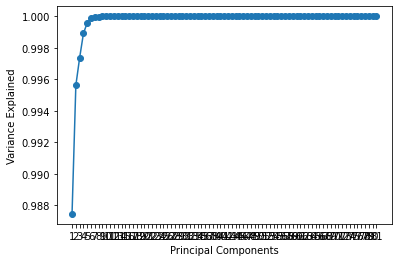

In [72]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

##### **4. Decision Trees**

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

fun_print_scores(dt, X_test, y_test, "Decision Trees")

Accuracy.....: 0.954
Bal. Accuracy: 0.766
F-1 Score....: 0.769
Recall.......: 0.766
Precision....: 0.775
Specificity..: 0.766

 [[32949   180    32     0    78     0   152  1090   186     9    31]
 [  216 42274     0     0     1     0    17     0     2     0     3]
 [   21     0  3095     0     0     0     1     3     0     0     0]
 [    2     0     0     1     0     0     0     0     0     0     0]
 [   67     0     0     0  3230     0    16   931     2     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0]
 [  159     9     0     1    14     0   458     9    46     0    17]
 [ 1063     3     0     0   998     0    19 22720     2     6     2]
 [  127     0     0     0     0     0    51     1  1112     0     5]
 [    8     0     0     0     1     0     0     2     0  7718     0]
 [   31     3     0     0     1     0    17     2     8     0  3228]]


##### **5. Random Forest Classifcation**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

fun_print_scores(rf, X_test, y_test, "Random Forest")

Accuracy.....: 0.969
Bal. Accuracy: 0.772
F-1 Score....: 0.802
Recall.......: 0.772
Precision....: 0.867
Specificity..: 0.772

 [[33620   158     0     0     4     0    56   765    86     4    14]
 [  117 42389     0     0     0     0     3     0     0     0     4]
 [   34     0  3083     0     0     0     0     3     0     0     0]
 [    0     0     0     1     0     0     2     0     0     0     0]
 [   48     1     0     0  3152     0     3  1042     0     0     0]
 [    0     0     0     0     0     0     0     1     0     0     0]
 [  183    12     0     0     9     0   462     6    34     0     7]
 [  697     5     0     0   201     0     1 23906     0     3     0]
 [  149     0     0     0     0     0    21     1  1123     0     2]
 [    3     4     0     0     1     0     0     0     0  7721     0]
 [   31     1     0     0     0     0    18     0     4     0  3236]]


##### **6. Naive Bayes**

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB() #provided
gnb.fit(X_train, y_train)

fun_print_scores(gnb, X_test, y_test, "Gaussian Naive Bayes")

Accuracy.....: 0.062
Bal. Accuracy: 0.178
F-1 Score....: 0.049
Recall.......: 0.178
Precision....: 0.145
Specificity..: 0.178

 [[    3   254    46    16     2     0    44    19  6698 17318 10307]
 [    1   149    27     0     0     0     8     2 15832 16134 10360]
 [    2    40   165     5     0     0    38    39   165  2185   481]
 [    0     0     0     0     0     0     0     0     0     1     2]
 [   19    59  1409    97   234     0    80   422   253  1315   358]
 [    0     0     0     0     0     0     0     0     0     0     1]
 [    7     0     1    11     5     0    38     3   340   136   172]
 [   56   366  2422   408   248     0   468  1002   315 13700  5828]
 [    0     0     0     0     0     0     1     0  1254    14    27]
 [    0     5    16     1     0     0     1     0  2725  3769  1212]
 [    1     0    15     5     0     0    17     2  1746   538   966]]


### **Conclusion**

In [71]:
display(conclude)

,Method,Accuracy,Bal. Accuracy,F-1 Score,Recall,Precision,Specificity
0,Decision Trees,0.953884,0.765957,0.768993,0.765957,0.775173,0.765957
1,Random Forest,0.969469,0.771824,0.802104,0.771824,0.866607,0.771824
2,Gaussian Naive Bayes,0.061912,0.177647,0.049286,0.177647,0.144947,0.177647
3,Gradient Boosting,0.960026,0.711642,0.729743,0.711642,0.754610,0.711642
4,K-Neighbors,0.601090,0.485525,0.473062,0.485525,0.467276,0.485525


Random Forest Classifier wins this classification. 

Accurate...: 96% of predictions classified correctly.

Precision..: 87% of true positives and total positives predicted correctly.

Recall.....: 77% of the data was classified well between correctly and incorrectly of Review_types

Specificity: 77%  of true negatives are correctly predicted by the model

F-1 Score..: 80% of the data has well known postives classified correctly and incorrectly. (Precision & Recall)


## **Thank you**